## 2. 단변량 선형회귀(Linear regression with one variable)

### 모델 표현(Model representation)

**집 가격 예측문제 (Portland, OR)**

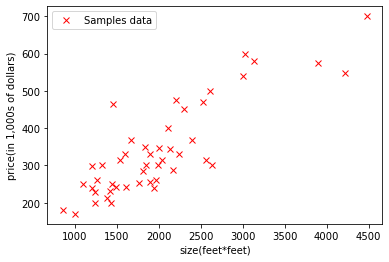

In [3]:
import numpy as np
import matplotlib.pyplot as plt

size_data = np.array([2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,  1380, 1494,  1940,
  2000,  1890,  4478,  1268,  2300, 1320,  1236,  2609,  3031,  1767,  1888,  1604, 1962,  3890,
  1100,  1458,  2526,  2200,  2637,  1839,  1000, 2040,  3137,  1811,  1437,  1239, 2132,  4215,
  2162,  1664,  2238,  2567,  1200,   852,   1852,  1203 ])

price_data = np.array([399900,  329900,  369000,  232000,  539900,  299900,  314900, 198999,  
  212000,  242500,  239999,  347000,  329999,  699900,  259900, 449900,  299900,  199900,  
  499998,  599000,  252900,  255000,  242900,  259900,  573900, 249900,  464500,  469000,  
  475000,  299900,  349900,  169900,  314900,  579900,  285900,  249900,  229900,  345000,  
  549000,  287000,  368500,  329900,  314000,  299000,  179900,  299900,  239500 ])

price_data = price_data / 1000.
# Display a plot
plt.plot(size_data, price_data, 'rx', label='Samples data')
plt.xlabel('size(feet*feet)')
plt.ylabel('price(in 1,000s of dollars)')
plt.legend()
plt.show()

* **지도/감독 학습(Supervised Learning)** - 자료의 “정확한 답＂이 각 예들에 대해 주어진 경우
* **회귀문제(Regression Problem)** - 실수 값을 갖는 출력을 예측하는 경우 (vs **분류문제** - 이산적인 출력을 예측)

#### 집 가격의 훈련집합(Portland, OR)

| Size ($feet^2$) (x) | Price (\$1000) (y) |
|----------------------|--------------------------|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| 852 | 180 |
| $\cdots$ | $\cdots$ |

기호 : 

$m =$ 훈련자료의 갯수 (=47)

$x's =$ "입력(input)" 변수 / 특징(features)

$y's =$ "출력(output)" 변수 / "목적(target)" 변수

$(x,y)$ - one training example

$(x^{(i)}, y^{(i)})$ - i-th training example

$x^{(1)}=2104$, $x^{(2)}=1416$, $y^{(1)}=400$ 

$$\text{[훈련자료집합]}$$
$$\downarrow$$
$$\text{[학습 알고리즘]}$$
$$\downarrow$$
$$   \text{ 집 크기} \rightarrow [ h ]\rightarrow \text{추정가격} $$

$$ \quad \quad x \ \rightarrow \text{hypothesis(가설)} \rightarrow \text{y의 추정치}$$ 
h 는  x 를 y 로 매핑해준다.

우리는 h를 어떻게 표현하는가?

$$h_\theta(x) = \theta_0 + \theta_1 x \quad or = h(x) $$

>

>

>

>

변수가 하나인 (i.e. x) 선형회귀 ==> 단변량 선형회귀 (Univariate linear regression)

In [3]:
def hypothesis(x,theta0,theta1):
    return theta0 + theta1*x

hypothesis(2000,100,0.08) # x=200, theta0=100, theta1=0.08

260.0

### 비용함수(Cost function)

**훈련자료**

| Size in $feet^2$ (x) | Price (\$) in 1000's (y) |
|----------------------|--------------------------|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| 852 | 180 |
| $\cdots$ | $\cdots$ |

가설(Hypothesis) : $h_\theta(x) = \theta_0 + \theta_1 x$

$\theta_i$: 파라메타(Parameters), 그러면, $\theta_i$는 어떻게 선택하는가?


$$h_\theta(x) = \theta_0 + \theta_1 x$$

|$\theta_0 = 1.5, \theta_1 = 0 $  |$\theta_0 = 0, \theta_1 = 0.5 $  |$\theta_0 = 1, \theta_1 = 0.5 $  |
|---------|--------|--------|
|<img src="./images/axis.PNG" width="150"> |<img src="./images/axis.PNG" width="150"> | <img src="./images/axis.PNG" width="150">|
| $ h(x) = 1.5 + 0\cdot x$  |$ h(x) = 0.5 x$ | $ h(x) = 1 + 0.5 x$ |


**생각** : $h_\theta(x)$ 가 우리의 훈련자료 $(x,y)$에서 $y$에 가깝도록 $\theta_0$ 과 $\theta_1$을 선택한다.
<img src="./images/axis.PNG" width="150">

$$ \underset{\theta_0, \theta_1}{\text{minimize }}  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $$

where $ h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} $


$$J(\theta_0, \theta_1) =  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $$


$$\min_{\theta_0, \theta_1} J(\theta_0, \theta_1) \quad \leftarrow \text{Minimize Cost Function (e.g. Squared error function)}$$
<hr>

### 비용함수(Cost function) - intuition I
<img src="./images/axis.PNG" width="150" align="right" style="margin-right:200px">

가설(Hyopthesis) : $h_\theta(x) = \theta_0 + \theta_1 x$

파라메타 : $\theta_0 , \theta_1 $

비용함수 : $J(\theta_0, \theta_1) =  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $

목적 : $\underset{\theta_0, \theta_1}{\text{minimize }} J(\theta_0, \theta_1)$
>

####  단순화 

<img src="./images/axis.PNG" width="150" align="right" style="margin-right:200px">

가설(Hyopthesis) : $h_\theta(x) = \theta_1 x$

파라메타 : $ \theta_1 $

비용함수 :  $J(\theta_1) =  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $
 
목적 : $\underset{\theta_1}{\text{minimize }} J(\theta_1)$
>
<hr>
 
| $h_\theta(x) \quad \quad \quad \quad \quad$           |  $J(\theta) \quad \quad \quad \quad \quad$ |
|-----------------------|--------------------------|
| (고정된$\theta_1$에 대해, 이것은 x의 함수) | (파라메타 $\theta_1$의 함수)   |
|When $\theta_1 = 1 $ <img src="./images/axis2.PNG" width="200">|<img src="./images/axis3.PNG" width="250"> |
 >
 
 >


| $h_\theta(x) \quad \quad \quad \quad \quad$           |  $J(\theta) \quad \quad \quad \quad \quad$ |
|-----------------------|--------------------------|
| (고정된$\theta_1$에 대해, 이것은 x의 함수) | (파라메타 $\theta_1$의 함수)   |
|When $\theta_1 = 0.5 $  <img src="./images/axis2.PNG" width="200">|<img src="./images/axis3.PNG" width="250"> |
 
 >
 
 >
 
| $h_\theta(x) \quad \quad \quad \quad \quad$           |  $J(\theta) \quad \quad \quad \quad \quad$ |
|-----------------------|--------------------------|
| (고정된$\theta_1$에 대해, 이것은 x의 함수) | (파라메타 $\theta_1$의 함수)   |
|When $\theta_1 = 0 $  <img src="./images/axis2.PNG" width="200">|<img src="./images/axis3.PNG" width="250"> |
 
 >
 
 >
 


### 비용함수(Cost function) - intuition II


**가설 (Hypothesis)** : $h_\theta(x) = \theta_0 + \theta_1 x$

**파라메타** : $\theta_0 , \theta_1 $

**비용함수** : $J(\theta_0, \theta_1) =  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $

**목적** : $\underset{\theta_0, \theta_1}{\text{minimize }} J(\theta_0, \theta_1)$

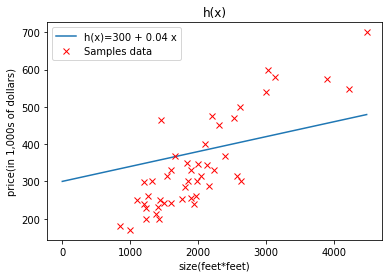

In [5]:
x = np.arange(0,4500,20)
y = 300 + 0.04 * x
plt.plot(x, y, '-', label='h(x)=300 + 0.04 x')

plt.plot(size_data, price_data, 'rx', label='Samples data')
plt.legend()
plt.xlabel('size(feet*feet)')
plt.ylabel('price(in 1,000s of dollars)')
plt.title('h(x)')
plt.draw()

<img src="./images/cost_function.png" width="400">

<img src="./images/contour-1.png" width="600">
<img src="./images/contour-2.png" width="600">
<img src="./images/contour-3.png" width="600">
<img src="./images/contour-4.png" width="600">

In [6]:
def computeCost(x,y,theta0,theta1):
    error = hypothesis(x,theta0,theta1) - y
    cost = np.sum(error**2) / (2*len(y))        
    return cost

print(computeCost(size_data,price_data,300,0.04))

5604.226059648935


### 경사하강 (Gradient Descent)

어떤 함수 $J(\theta_0, \theta_1)$를 가지고,


$\underset{\theta_0, \theta_1}{\text{min }} J(\theta_0, \theta_1)$ 를 원한다.

**Outline** : 
* 임의의 $\theta_0, \theta_1$로 시작한다.(e.g. $\theta_0=0$, $\theta_1=0$)
* $J(\theta_0, \theta_1)$가 감소하도록 $\theta_0, \theta_1$를 계속 변화시키면서 최소값에 도달할 때까지 수행한다, .


<img src="./images/gradient-descent-ani.gif" width="500">

<img src="https://miro.medium.com/max/2732/1*iU1QCnSTKrDjIPjSAENLuQ.png" width="400">


**Gradient Descent algorithm**

repeat until convergence {

$\quad \theta_j := \theta_j - \alpha { \partial \over \partial \theta_j} J (\theta_0, \theta_1) \quad  (\text{for } j=0 \text{ and } j=1)$
    
}

| **Correct : Simultaneous update ** |...| **Incorrect : Separate update  ** |
|---------------------------------------|---|------------------|
| temp0 := $\theta_0 - \alpha { \partial \over \partial \theta_0} J (\theta_0, \theta_1)$  | . | $\theta_0$ := $\theta_0 - \alpha { \partial \over \partial \theta_0} J (\theta_0, \theta_1)$  |
| temp1 := $\theta_1 - \alpha { \partial \over \partial \theta_1} J (\theta_0, \theta_1)$  | . | $\theta_1 $ := $\theta_1 - \alpha { \partial \over \partial \theta_1} J (\theta_0, \theta_1)$  |
| $\theta_0 := temp0 $ | . | . |
| $\theta_1 := temp1 $ | . | . |
<hr>

### Gradient Descent Intuition

#### 경사하강 알고리즘

repeat until convergence {
    $$\theta_j := \theta_j - \alpha { \partial \over \partial \theta_j} J (\theta_0, \theta_1) \quad  (\text{simultaneously update } j=0 \text{ and } j=1)$$
}


>

| <center>Positive Slope</center> | <center>Negative Slope</center> |
|-----------|---------------|
|<img src="./images/axis4.PNG" width="250"  > | <img src="./images/axis4.PNG" width="250" > |

>

>

>
<hr>

<hr>
$\theta_1 := \theta_1 - \alpha {\partial \over \partial \theta_1} J (\theta_1) $ $ \quad \rightarrow \quad \alpha$ (learning rate) 의 의미.

| $\alpha$ 가 너무 작으면, 경사강하가 느릴 수 있다. | $\alpha$ 가 너무 크면,경사하강은 최소점을 지나칠 수 있다.  <br>  수렴에 실패하거나 심지어는 발산할 수도 있다. |
|-----------|---------------|
|<img src="./images/axis4.PNG" width="250"  > | <img src="./images/axis4.PNG" width="250" > |

<hr>


<img src="./images/local_min.PNG" width="400">

<img src="./images/axis4.PNG" width="250" align="right">
경사하강은 학습률 α 가 고정된 상태로도, 국지적 최소점으로 수렴할 수 있다.

$\theta_1 := \theta_1 - \alpha {\partial \over \partial \theta_1} J (\theta_1) $

우리가 국지적 최소값에 접근함에 따라서, 경사하강은 자동적으로 더 작은 단계를 취한다. 따라서, 시간에 따라서 α 를 줄일 필요가 없다.

### Gradient Descent for linear regression

**경사하강 알고리즘**

repeat until convergence {
    $$\theta_j := \theta_j - \alpha { \partial \over \partial \theta_j} J (\theta_0, \theta_1) \quad  (\text{for } j=0 \text{ and } j=1)$$
}

<hr>

**선형회기 모델**

$h_\theta(x) = \theta_0 + \theta_1 x$

$J(\theta_0, \theta_1) =  { 1 \over 2m} \sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2 $

<hr>


${\partial \over \partial \theta_j} J(\theta_0, \theta_1) = $
>
>


$ j = 0 : {\partial \over \partial \theta_0} J(\theta_0, \theta_1) = $


$ j = 1 : {\partial \over \partial \theta_1} J(\theta_0, \theta_1) = $

**Gradient descent algorithm**

repeat until convergence {
    
$\theta_0 := \theta_0 - \alpha { 1 \over m} \sum_{i=1}^m (h_\theta (x^{(i)}) -y^{(i)}) $
    
$\theta_1 := \theta_1 - \alpha { 1 \over m} \sum_{i=1}^m (h_\theta (x^{(i)}) -y^{(i)}) \cdot x^{(i)} $

}

<img src="https://miro.medium.com/max/1098/1*yasmQ5kvlmbYMe8eDkyl6w.png" width="400">

<img src="https://miro.medium.com/max/2732/1*iU1QCnSTKrDjIPjSAENLuQ.png" width="400">

<img src="images/cost_function.png" width="400">

<img src="./images/contour-01.png" width="500">
<img src="./images/contour-02.png" width="500">
<img src="./images/contour-03.png" width="500">
<img src="./images/contour-04.png" width="500">
<img src="./images/contour-05.png" width="500">
<img src="./images/contour-06.png" width="500">
<img src="./images/contour-07.png" width="500">
<img src="./images/contour-08.png" width="500">
<img src="./images/contour-09.png" width="500">

h(x) =0.0 + 0.16x


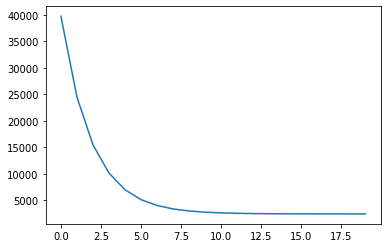

In [7]:
def gradientDescent(x,y,theta0,theta1,alpha=0.01,n_iters=100):
    m = len(y)
    J_history = np.zeros(n_iters)
    
    for i in range(n_iters):
        error = hypothesis(x,theta0,theta1) - y
        theta0 -= alpha * np.sum(error) / m
        theta1 -= alpha * np.sum(error * x) / m
        J_history[i] = computeCost(x,y,theta0,theta1)
    
    return theta0, theta1, J_history

theta0 = 0.
theta1 = 0.
lr = 0.00000005
n_iter = 20
theta0, theta1, J_history = gradientDescent(size_data,price_data,theta0,theta1,lr,n_iter)

print("h(x) =" + str(round(theta0,2)) + " + " + str(round(theta1,2)) + "x")
plt.plot(J_history)

#### "배치(Batch)" 경사 하강

* "배치(Batch)" 경사하강 - 경사하강의 각 단계마다 모든 훈련자료를 사용함
* "미니-배치(Mini-batch)" 경사하강 - 경사하강의 각 단계마다 훈련자료의 일부만을 사용함
* "통계적(Stochastic) 경사하강 - 경사하강의 각 단계마다 훈련자료의 하나씩 만을 사용함

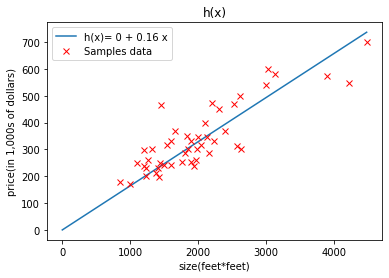

In [8]:
x = np.arange(0,4500,20)
y = theta0 + theta1 * x
plt.plot(x, y, '-', label='h(x)= 0 + 0.16 x')

plt.plot(size_data, price_data, 'rx', label='Samples data')
plt.legend()
plt.xlabel('size(feet*feet)')
plt.ylabel('price(in 1,000s of dollars)')
plt.title('h(x)')
plt.draw()